<a href="https://colab.research.google.com/github/surajsrivathsa/applied_statistics/blob/main/Chisquaredtest_Categorical_Featureselection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

We will apply  Chi-Square test of independence in this video.  Chi-Square test of independence is used to determine if there is a significant relationship between two categorical variables. But this is a quick and easy way of testing importance of feature. If not important then eliminate the column from ml model

Other ways are backward elimination, forward selection. If we have large dataset then subsample data into chunks and train xgboost or random forest classifier on them. With each classifier we get feature importance.

We can also have probablistic ways.

In [6]:
churn_master_df = pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/churn_data_st.csv')
churn_df = churn_master_df.copy()

In [7]:
churn_df.head()

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,2,Month-to-month,Yes,29.85,29.85,No
1,5575-GNVDE,Male,0,34,4,One year,No,56.95,1889.50,No
2,3668-QPYBK,Male,0,2,4,Month-to-month,Yes,53.85,108.15,Yes
3,7795-CFOCW,Male,0,45,4,One year,No,42.30,1840.75,No
4,9237-HQITU,Female,0,2,2,Month-to-month,Yes,70.70,151.65,Yes


In [8]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   tenure            7043 non-null   int64  
 4   ServiceCount      7043 non-null   int64  
 5   Contract          7043 non-null   object 
 6   PaperlessBilling  7043 non-null   object 
 7   MonthlyCharges    7043 non-null   float64
 8   TotalCharges      7016 non-null   float64
 9   Churn             7043 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 550.4+ KB


Null Hypothesis: There is no relationship between two columns

Alternate hypothesis: There is a relationship between two columns

use p value < 0.05 to know reject null hypothesis

We are trying to find whether gender or paperlessbilling has any relation with target column Churn

1. Is there any relationship between the gender of the user and churn?

2. Is there any user who have opted for paperlessbilling to churning out?

In [9]:
churn_df["gender"].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

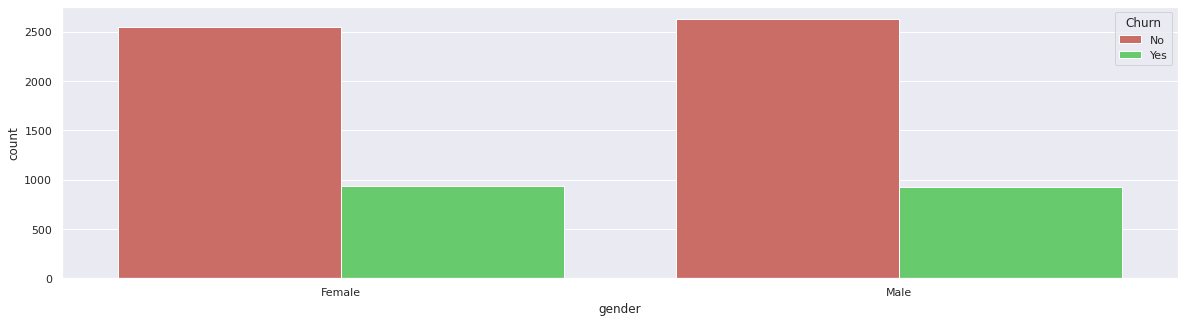

In [10]:
sns.set(style="darkgrid")
sns.set_palette("hls", 3)
fig, ax = plt.subplots(figsize=(20, 5))

ax = sns.countplot(x = "gender", hue = "Churn", data=churn_df)

We can see from above that male and female almost have same stats wrt churn thereby signalling that gender may not have an important role to play.

But statistical test are not the end because they are based on relative likelyhood. Sometimes in real life it may fail p value test but may impact target. This should be determined by person having domain knowledge.

For Chisquared test we must create a contingency table(crosstab)

In [12]:
gender_churn_ct = pd.crosstab(index=churn_df["gender"], columns=churn_df["Churn"])
gender_churn_ct

Churn,No,Yes
gender,,
Female,2549,939
Male,2625,930


pearsons could be changed to log likelyhood using lambda parameter

In [16]:
(chi2, p, dof, _) = stats.chi2_contingency([gender_churn_ct.iloc[0].values, gender_churn_ct.iloc[1].values])

We can see that p value > 0.05 hence insignificant. Null hypothesis is proved

In [17]:
print("chi2: ", chi2)
print("p: ", p)
print("dof: ", dof)

chi2:  0.4840828822091383
p:  0.48657873605618596
dof:  1


In [19]:
churn_df["PaperlessBilling"].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

In [20]:
paperlessbilling_churn_ct = pd.crosstab(index=churn_df["PaperlessBilling"], columns=churn_df["Churn"], margins=True)
paperlessbilling_churn_ct

Churn,No,Yes,All
PaperlessBilling,,,
No,2403,469,2872
Yes,2771,1400,4171
All,5174,1869,7043


We can see that if people has opted for paperless billing then more people churn than 

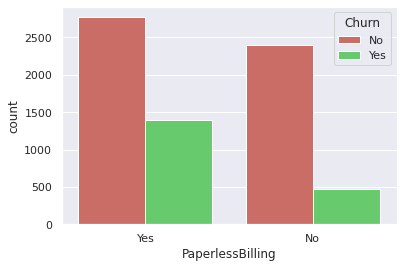

In [21]:
ax = sns.countplot(x = "PaperlessBilling", hue = "Churn", data=churn_df)

We can see that paper less billing has enorous significance with high chisquared and low p value wrt Churn. Maybe people who opt for paperless billing are more environmentally aware they read a lot about other offers from other service providers, Hence they churn out more. 

But this can be an empty can that such significance may exists only in data but have negligible impact in real life (coffee is good for health vs coffee is bad for health). This is where domain importance comes to play and you can decide.

In [22]:
(chi2, p, dof, _) = stats.chi2_contingency([paperlessbilling_churn_ct.iloc[0].values, paperlessbilling_churn_ct.iloc[1].values])
print("chi2: ", chi2)
print("p: ", p)
print("dof: ", dof)

chi2:  259.1609742710177
p:  5.295530511965376e-57
dof:  2
